# Лабораторна робота № 3 {#sec-rqa-title}

**Тема.** Кількісний аналіз рекурентних діаграм

**Мета.** Ознайомитись з кількісними оцінками рекурентних діаграм для аналізу 
динаміки складних систем

## Теоретичні відомості

Для якісного опису системи графічне представлення системи підходить якнайкраще. Однак головним недоліком графічного представлення є те, що воно змушує користувачів суб'єктивно інтуїтивно інтерпретувати закономірності та структури, представлені на рекурентній діаграмі.

Крім того, зі збільшенням розміру даних, проблематичним представляється аналіз усіх $N^2$ значень. Як наслідок, доводиться працювати з окремими ділянками вихідних даних. Аналіз у такий спосіб може створювати нові дефекти, які спотворюють об'єктивність спостережуваних закономірностей і призводять до неправильних інтерпретацій. Щоб подолати це обмеження і поширити об'єктивну оцінку серед дослідників, на початку 1990-х років Веббером та Збілутом [@doi:10.1152/jappl.1994.76.2.965;@ZBILUT1992199] були введені визначення та процедури для кількісної оцінки складності рекурентних діаграм, а згодом вони були розширені Марваном та ін [@PhysRevE.66.026702]. 

Дрібномасштабні кластери можуть являти собою комбінацію ізольованих точок (випадкових рекурентностей). Подібна еволюція в різні періоди часу або в зворотному часовому порядку представлятиме діагональні лінії (детерміновані структури), а також вертикальні/горизонтальні лінії для позначення ламінарних станів (переривчастість) або станів, що предсталяють сингулярності. Для кількісного опису системи системи такі дрібномасштабні кластери слугують основою **кількісного рекурентного аналізу** (recurrence quantification analysis, RQA) [@DBLP:conf/m3e2/BielinskyiSSSR22].

## Хід роботи

Перш ніж переходити до опису кожної з мір та їх розрахунків, визначимось з інструментарієм для виконання RQA. Як і до цього, ми використаємо бібліотеку `neuralkit2`. 

Імпортуємо бібліотеки для подальшої роботи:

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import neurokit2 as nk
import yfinance as yf
import scienceplots
import pandas as pd
from tqdm import tqdm

%matplotlib inline

І виконаємо налаштування рисунків для виводу:

In [2]:
plt.style.use(['science', 'notebook', 'grid']) # стиль, що використовуватиметься
                                               # для виведення рисунків

size = 16
params = {
    'figure.figsize': (8, 6),            # встановлюємо ширину та висоту рисунків за замовчуванням
    'font.size': size,                   # розмір фонтів рисунку
    'lines.linewidth': 2,                # товщина ліній
    'axes.titlesize': 'small',           # розмір титулки над рисунком
    'axes.labelsize': size,              # розмір підписів по осям
    'legend.fontsize': size,             # розмір легенди
    'xtick.labelsize': size,             # розмір розмітки по осі Ох
    'ytick.labelsize': size,             # розмір розмітки по осі Ох
    "font.family": "Serif",              # сімейство стилів підписів 
    "font.serif": ["Times New Roman"],   # стиль підпису
    'savefig.dpi': 300,                  # якість збережених зображень
    'axes.grid': False                   # побудова сітки на самому рисунку
}

plt.rcParams.update(params)              # оновлення стилю згідно налаштувань

Розглянемо можливість використання всіх згаданих показників у якості індикаторів або індикаторів-передвісників кризових явищ. Для прикладу завантажимо часовий ряд фондового індексу Доу-Джонса за період з 1 грудня 1993 по 1 грудня 2022:

In [3]:
symbol = '^DJI'          # Символ індексу
start = "1993-01-01"     # Дата початку зчитування даних
end = "2022-01-01"       # Дата закінчення зчитування даних

data = yf.download(symbol, start, end)  # вивантажуємо дані
time_ser = data['Close'].copy()     # зберігаємо саме ціни закриття

xlabel = 'time, days'    # підпис по вісі Ох 
ylabel = symbol          # підпис по вісі Оу

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


::: {.callout-warning}
## Увага

Виконайте цей блок, якщо хочете зчитати дані не з Yahoo! Finance, а із власного файлу. Зрозуміло, що й аналіз результатів і висновки залежать від того, з яким рядом ми працюємо

:::

---

In [ ]:
symbol = 'sMpa11'                  # Символ індексу

path = "databases\sMpa11.txt"      # шлях по якому здійснюється зчитування файлу
data = pd.read_csv(path,           # зчитування даних 
                   names=[symbol])
time_ser = data[symbol].copy()     # копіюємо значення кривої 
                                   # "напруга-видовження" до окремої змінної

xlabel = r'$\varepsilon$'          # підпис по вісі Ох 
ylabel = symbol                    # підпис по вісі Оу

---

Виведемо досліджуваний ряд:

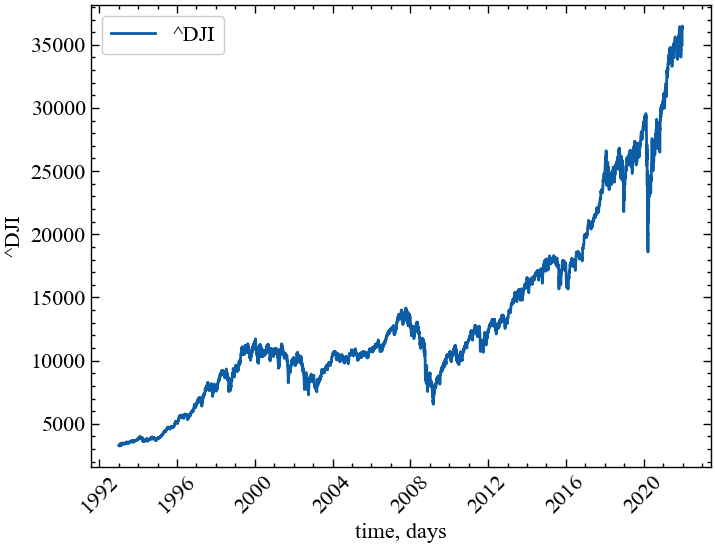

In [4]:
#| label: fig-dji-init 
#| fig-cap: "Динаміка щоденних змін індексу Доу-Джонса"

fig, ax = plt.subplots()                   # Створюємо порожній графік
ax.plot(time_ser.index, time_ser.values)   # Додаємо дані до графіку
ax.legend([symbol])                        # Додаємо легенду
ax.set_xlabel(xlabel)                      # Встановимо підпис по вісі Ох
ax.set_ylabel(ylabel)                      # Встановимо підпис по вісі Oy

plt.xticks(rotation=45)                    # оберт позначок по осі Ох на 45 градусів

plt.savefig(f'{symbol}.jpg')               # Зберігаємо графік 
plt.show();                                # Виводимо графік

Користуючись тими методами, що ми розглянули в попередній лабораторній роботі, побудуємо атрактор даного ряду та його рекурентну діаграму. Але, перш за все, стандартизуємо наш ряд. Для цього оголосимо функцію `transformation()`, що прийматиме на вхід часовий сигнал, тип ряду, і повертатиме його перетворення:

In [5]:
def transformation(signal, ret_type):

    for_rec = signal.copy()

    if ret_type == 1:       # Зважаючи на вид ряду, виконуємо
                            # необхідні перетворення
        pass
    elif ret_type == 2:
        for_rec = for_rec.diff()
    elif ret_type == 3:
        for_rec = for_rec.pct_change()
    elif ret_type == 4:
        for_rec = for_rec.pct_change()
        for_rec -= for_rec.mean()
        for_rec /= for_rec.std()
    elif ret_type == 5: 
        for_rec = for_rec.pct_change()
        for_rec -= for_rec.mean()
        for_rec /= for_rec.std()
        for_rec = for_rec.abs()
    elif ret_type == 6:
        for_rec -= for_rec.mean()
        for_rec /= for_rec.std()

    for_rec = for_rec.dropna().values

    return for_rec

Далі приводимо ряд до стандартизованого вигляду:

::: {.callout-note}
## Примітка для побудови матриці рекурентності

Як уже зазначалось на початку, рекурентна діаграма --- це двовимірна квадратна двійкова матриця розміром $N^2$. Тому в подальшому ми пропонуємо будувати рекурентну матрицю не для всього ряду, а тільки для його підмножини. Для цього ми визначимо змінні початкового (`idx_beg`) та кінцевого (`inx_end`) відліку в межах якого буде здійснюватись побудова рекурентної матриці

:::

In [10]:
signal = time_ser.copy()
ret_type = 6    # вид ряду: 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

idx_beg = 3000    # кінцевий відлік
idx_end = 7300 # початковий відлік

fragm = signal[idx_beg:idx_end] # виокремлюємо фрагмент ряду

all_series = transformation(signal, ret_type) # виконуємо перетворення всього ряду

for_rec = transformation(fragm, ret_type).flatten() # виконуємо перетворення фрагменту

На [@fig-dji-fragm] представлено весь трансформований ряд та його фрагмент: 

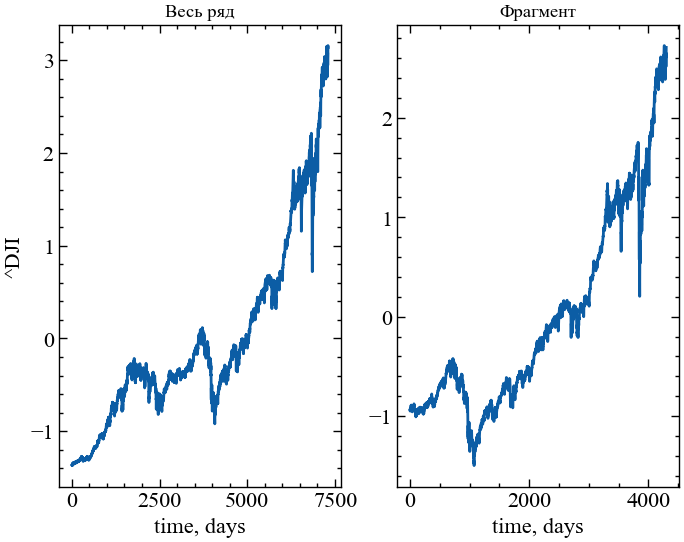

In [11]:
#| label: fig-dji-fragm 
#| fig-cap: "Динаміка всього трансформованого ряду з використанням функції transformation() (рисунок зліва)
#| та його фрагменту (рисунок справа)"

fig, ax = plt.subplots(1, 2)

ax[0].plot(all_series)
ax[0].set_title("Весь ряд")
ax[0].set_xlabel(xlabel)
ax[0].set_ylabel(ylabel)

ax[1].plot(for_rec)
ax[1].set_title("Фрагмент")
ax[1].set_xlabel(xlabel)

plt.show();

Для всього ряду і для віконної процедури визначимо наступні параметри:

- розмірність вкладень $m=3$; 
- часова затримка $\tau=1$; 
- радіус багатовимірного околу $\varepsilon = 0.3$. 

Задамо необхідні параметри для обчислення та виводу:

In [12]:
m = 3                         # розмірність вкладень
tau = 1                       # часові затримка
eps = 0.3                     # радіус

І тепер подивимось на фазові траєкторії досліджуваної системи у дво- та тривимірному просторах:

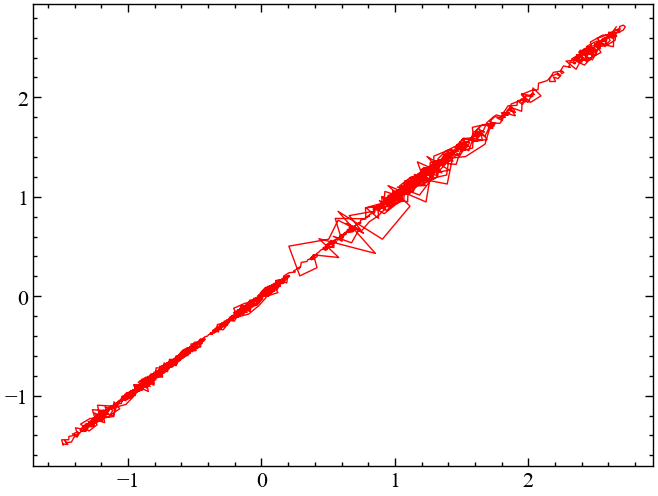

In [13]:
#| label: fig-dji-2d
#| fig-cap: "Двовимірний фазовий портрет стандартизованих
#| вихідних значень досліджуваного ряду Доу-Джонса"

nk.complexity_attractor(nk.complexity_embedding(for_rec, dimension=2, delay=tau), 
                        alpha=1, 
                        color="red"); 

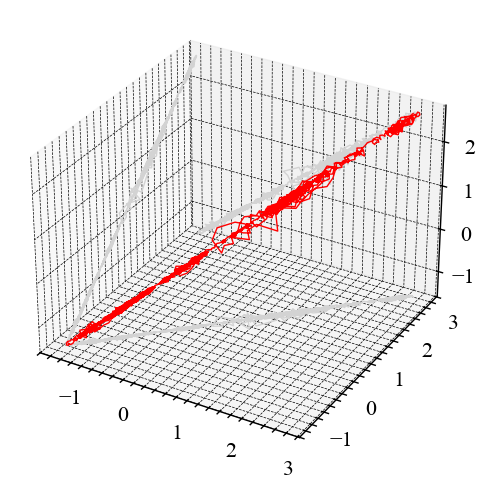

In [14]:
#| label: fig-dji-3d
#| fig-cap: "Тривимірний фазовий портрет стандартизованих
#| вихідних значень досліджуваного ряду Доу-Джонса"

nk.complexity_attractor(nk.complexity_embedding(for_rec, dimension=3, delay=tau), 
                        alpha=1, 
                        color="red"); 

Як можна бачити по візуальному огляду траєкторій у фазовому просторі важко робити висновки стосовно передбачуванності або хаотичності системи. Спробуємо ще раз, але тепер послуговуючись рекурентною діаграмою:

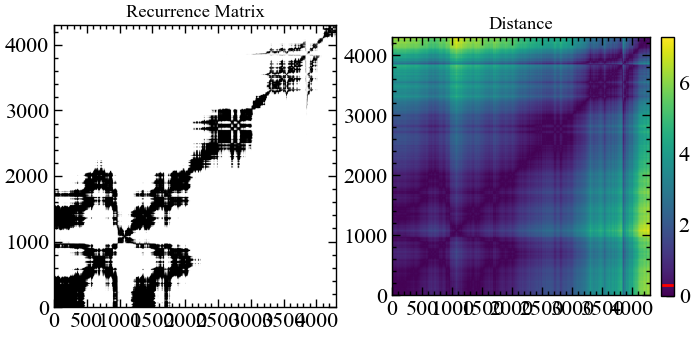

In [15]:
#| label: fig-dji-init-stand
#| fig-cap: "Рекурентна матриця для стандартизованого вихідного ряду Доу-Джонса"

rc, _ = nk.recurrence_matrix(for_rec, 
                            delay=1, 
                            dimension=m,
                            tolerance=eps,
                            show=True)

На основі рекурентної діаграми в перспективі ми можемо отримати куди більше інформації стосовно еволюції системи. Видно, що 2008 рік характеризувався найвищим ступенем самоорганізації (рекурентності), про що свідчить доволі велика щільність чорних областей. У той же час можна бачити, що й останні роки характеризуються найменшим ступенем рекурентності. Можливо, прогнозованість подій у межах 2022 року варто було б охарактеризувати за допомогою інших індикаторів, але рекурентна матриця свідчить про те, що події минулих років мало корелюють з сьогоденням.

Ми вже зазначали, що якісна репрезентація рекурентності станів не є достатньо об'єктивною. Найращим варіантом у даному випадку буде використання рекурентного аналізу за алгоритмом рухомого вікна.


### Віконна процедура

Для подальшої роботи створюємо віконну процедуру, в якій знов визначаємо вид ряду та ще декілька параметрів. Потім ми ініціалізуємо масиви для кожної рекурентної міри:

In [16]:
ret_type = 6            # вид ряду
window = 250            # ширина вікна
tstep = 1               # часовий крок вікна 
length = len(time_ser)  # довжина самого ряду

m = 1                   # розмірність вкладень
tau = 1                 # часові затримка
eps = 0.3               # радіус

# Ініціалізуємо масиви для збереження віконних значень 
# рекурентних мір

RR = []                 # Частота повторення
DET = []                # Детермінізм
DIV = []                # Розбіжність
AVG_DIAG_LINE = []      # Усереднена довжина діагональних ліній
ENT_DIAG = []           # Ентропія діагональних ліній
LAM = []                # Ламінарність
TT = []                 # Час затримки
ENT_VERT = []           # Ентропія вертикальних ліній
ENT_WHITE_VERT = []     # Ентропія білих вертикальних ліній
AVG_WVERT_LINE = []     # Усереднена довжина білих вертикальних ліній
VERT_DIV = []           # Розбіжність вертикальних ліній
RATIO_DET_REC = []      # Відношення детермінізму до частоти повторень
RATIO_LAM_DET = []      # Відношення ламінарності до детермінізму
WHITE_VERT_DIV = []     # Розбіжність білих вертикальних ліній
DIAG_RR = []            # Діагональна частота рекурентних значень

Для подальших розрахунків ми використаємо метод `complexity_rqa()` бібліотеки `neuralkit2`. його синтаксис:

**`complexity_rqa(signal, dimension=3, delay=1, tolerance='sd', min_linelength=2, method='python', show=False)`**

**Параметри:**

- **signal** (*Union[list, np.ndarray, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень;
- **delay** (*int*) --- затримка в часі;
- **dimension** (*int*) --- розмірність вкладень, $m$; 
- **tolerance** (*float*) --- радіус $\varepsilon$ багатовимірного околу в межах якого шукаються рекурентні траєкторії (часто позначається як $r$), відстань, на якій дві точки даних вважаються схожими. Якщо `"sd"` (за замовчуванням), буде встановлено значення $0.2 \cdot SD_{signal}$, де $SD_{signal}$ визначає стандартне відхилення ряду;
- **min_linelength** (*int*) --- мінімальна довжина діагональних та вертикальних ліній. За замовчування дорівнює 2; 
- **method** (*str*) --- Може бути `"pyrqa"` для виконання рекурентного аналізу, але із використанням бібліотеки `PyRQA` (потребує додаткового встановлення);
- **show** (*bool*) --- візуалізувати рекурентну матрицю.

**Повертає:**

- **rqa** (*DataFrame*) --- результати процедури RQA;
- **info** (*dict*) --- словник, що містить інформацію відносно параметрів RQA. 

Тепер можемо приступити до віконної процедури:

In [18]:
for i in tqdm(range(0,length-window,tstep)):  # фрагменти довжиною window  
                                              # з кроком tstep

    fragm = time_ser.iloc[i:i+window].copy()  # відбираємо фрагмент

    fragm = transformation(fragm, ret_type).flatten()   # виконуємо процедуру 
                                              # трансформації ряду
    
    resultRQA, _ = nk.complexity_rqa(fragm,
                                     delay=tau,
                                     dimension=m,
                                     tolerance=eps)
    
    # Обчислення відношення ламінарності до детермінізму
    resultRQA['LamiDet'] = resultRQA['Laminarity']/resultRQA['Determinism']

    # Обчислення дивергенції чорних вертикальних ліній
    resultRQA['VDiv'] = 1./resultRQA['VMax']

    # Обчислення дивергенції білих вертикальних ліній
    resultRQA['WVDiv'] = 1./resultRQA['WMax']

    RR.append(resultRQA['RecurrenceRate'])
    DET.append(resultRQA['Determinism'])
    DIV.append(resultRQA['Divergence']) 
    AVG_DIAG_LINE.append(resultRQA['L'])
    ENT_DIAG.append(resultRQA['LEn'])
    LAM.append(resultRQA['Laminarity']) 
    TT.append(resultRQA['TrappingTime']) 
    ENT_VERT.append(resultRQA['VEn'])
    ENT_WHITE_VERT.append(resultRQA['WEn'])
    AVG_WVERT_LINE.append(resultRQA['W']) 
    VERT_DIV.append(resultRQA['VDiv'])
    WHITE_VERT_DIV.append(resultRQA['WVDiv'])
    RATIO_DET_REC.append(resultRQA['DeteRec']) 
    RATIO_LAM_DET.append(resultRQA['LamiDet'])
    DIAG_RR.append(resultRQA['DiagRec'])

100%|██████████| 7054/7054 [02:02<00:00, 57.51it/s]


Зберігаємо отримані результати в текстових файлах:

In [19]:
name = f"RQA_classic_name={symbol}_window={window}_ \
    step={tstep}_rettype={ret_type}_m={m}_ \
    tau={tau}_eps={eps}.txt"

np.savetxt("RR" + name, RR)
np.savetxt("DIAG_RR" + name, DIAG_RR)
np.savetxt("DET" + name, DET)
np.savetxt("DIV" + name, DIV)
np.savetxt("VERT_DIV" + name, VERT_DIV)
np.savetxt("WHITE_VERT_DIV" + name, WHITE_VERT_DIV)
np.savetxt("LAM" + name, LAM)
np.savetxt("TT" + name, TT)
np.savetxt("AVG_DIAG_LINE" + name, AVG_DIAG_LINE)
np.savetxt("AVG_WRITE_VERT_LINE" + name, AVG_WVERT_LINE)
np.savetxt("ENT_DIAG" + name, ENT_DIAG)
np.savetxt("ENT_VERT" + name, ENT_VERT)
np.savetxt("ENT_WHITE_VERT" + name, ENT_WHITE_VERT)
np.savetxt("RATIO_DET_REC" + name, RATIO_DET_REC)
np.savetxt("RATIO_LAM_DET" + name, RATIO_LAM_DET)

### Рекурентні міри

Займемося побудовою та інтерпретацією отриманих результатів. Для візуалізації графіків визначимо наступну функцію:

In [20]:
def plot_recurrence_measure(measure, label, clr="magenta"):

    fig, ax = plt.subplots()

    ax2 = ax.twinx()

    ax2.spines.right.set_position(("axes", 1.03))

    p1, = ax.plot(time_ser.index[window:length:tstep], 
                  time_ser.values[window:length:tstep], 
                  "b-", label=fr"{ylabel}")
    p2, = ax2.plot(time_ser.index[window:length:tstep],
                   measure, 
                   color=clr, 
                   label=fr'${label}$')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(f"{ylabel}")

    ax.yaxis.label.set_color(p1.get_color())
    ax2.yaxis.label.set_color(p2.get_color())

    tkw = dict(size=2, width=1.5)

    ax.tick_params(axis='x', rotation=45, **tkw)
    ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
    ax2.tick_params(axis='y', colors=p2.get_color(), **tkw)
    ax2.legend(handles=[p1, p2])

    plt.savefig(label +
        f" RQA_classic_name={symbol}_window={window}_step={tstep}_ \
        rettype={ret_type}_m={m}_tau={tau}_eps={eps}.jpg")
        
    plt.show();

#### Частота рекурентності

Найпростішим показником є **частота рекурентності** (recurrence rate), яка визначає щільність рекурентних точок на діаграмі, ігноруючи лінію ідентичності:

$$
RR = \frac{1}{N^2}\displaystyle\sum_{i,j=1}^{N}R(i,j). 
$$

$N$ --- кількість точок на траєкторії фазового простору.

Частота рекурентності відповідає ймовірності того, що певний стан повториться.

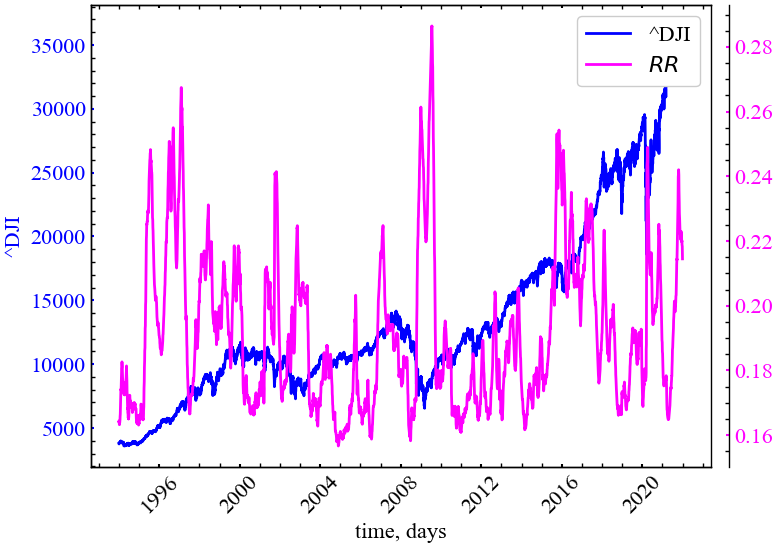

In [21]:
#| label: fig-dji-rr 
#| fig-cap: "Динаміка індексу Доу-Джонса та частоти рекурентності"

plot_recurrence_measure(measure=RR, label='RR')

Як ми можемо бачити з представленого рисунку ([@fig-dji-rr]), міра рекурентності зростає при крахових подіях, що вказує на зростання ступеня самоорганізації та злагодженості торгівельної активності трейдерів на цьому ринку. 

#### Діагональна частота рекурентності 

Даний підхід базується на діагональних рекурентних профілях часового ряду [@e24091314]. Діагональний рекурентний профіль визначає кількість рекурентних точок на різних лагах подібно до функції автокореляцій. Для отримання діагонального профілю рекурентностей просто підраховується частка рекурентних точок на діагоналях, розташованих у нижньому правому або нижньому лівому куті діаграми, і будується графік як функція відстані від головної діагоналі, тобто лагу.

Іншими словами, **діагональна частота рекурентності** (diagonal recurrence rate) фіксує величину автокореляції на різних лагах. 

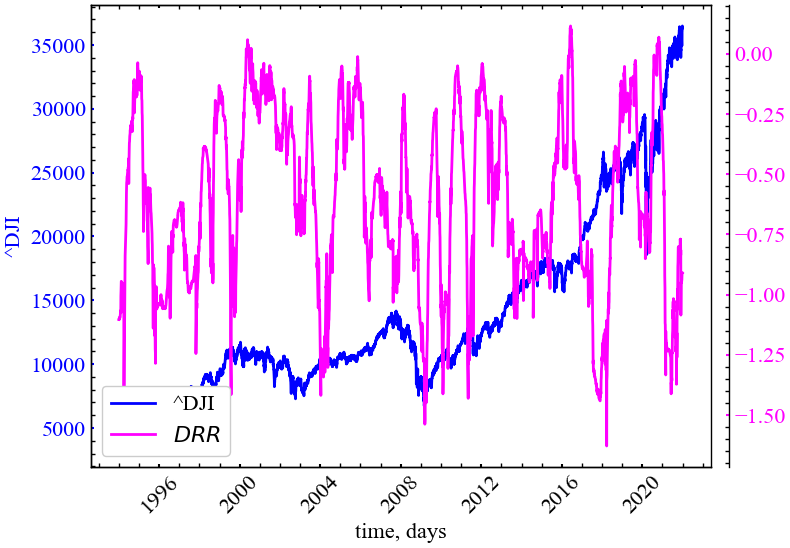

In [22]:
#| label: fig-dji-diag-rr 
#| fig-cap: "Динаміка індексу Доу-Джонса та діагональної частоти рекурентності"

plot_recurrence_measure(measure=DIAG_RR, label='DRR')

З [@fig-dji-diag-rr] видно, що діагональна частота рекурентності зростає у передкризові та кризові періоди, вказує на зростання величини автокореляції, що в свою чергу демонструє ріст ступеня самоорганізації.

#### Детермінізм 

Наступним показником можна визначити частку рекурентних траєкторій, які формують діагональні лінії мінімальної довжини ${\displaystyle \ell_{\min}}$. Ця міра називається **детермінізмом** (determinism) і пов'язана з передбачуваністю динамічної системи:

$$
DET= \sum_{\ell=\ell_{\min }}^{N}\ell \cdot P(\ell) \Bigg/ \sum_{\ell=1}^{N}\ell \cdot P(\ell),
$$

де $P(\ell )$ --- частотний розподіл довжин $\ell$ діагональних ліній.

::: {.callout-tip}
## Додаткова інформація по детермінізму

Детерміновані системи характеризуються значною варіацією діагональних ліній різної довжини. Періодичні сигнали характеризуються довгими діагональними лініями, в той час як для хаотичних сигналів діагональні лінії будуть короткими. Для стохастичним систем діагональні лінії взагалі будуть відсутніми, за винятком випадкових закономріностей, що утворюватимуть дуже короткі діагональні лінії.

Білий шум, наприклад, мав би рекурентну діаграму з майже ізольованими рекурентними точками та дуже малим відсотком діагональних ліній, тоді як детермінований процес демонстрував би дуже малу кількість поодиноких рекурентностей, але велику щільність довгих діагональних ліній.

:::

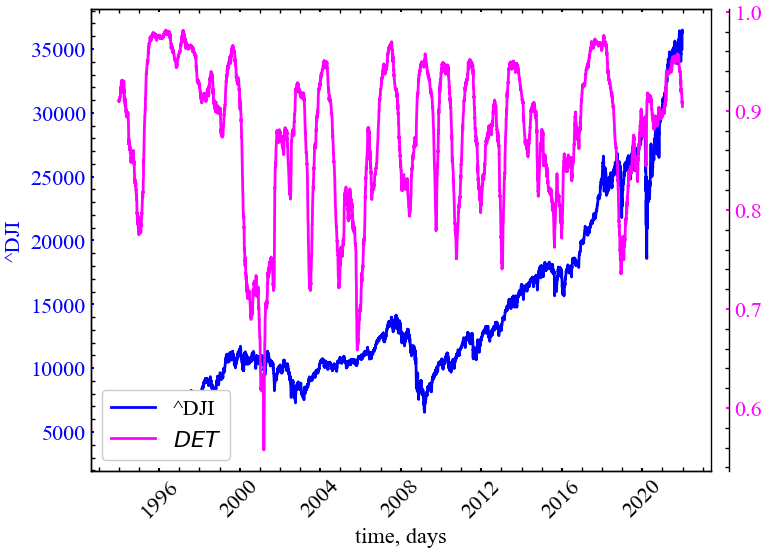

In [23]:
#| label: fig-dji-det 
#| fig-cap: "Динаміка індексу Доу-Джонса та міри $DET$"

plot_recurrence_measure(measure=DET, label='DET')

Як ми можемо бачити з [@fig-dji-det], у передкризові та кризові періоди показник детермінізму починає зростати, що свідчить і про зростання ступеня передбачуваності (впорядкованості) флуктуацій системи.

#### Ламінарність 

Показник, що характеризує кількість рекурентних станів, які утворюють вертикальні лінії, називається **ламінарністю** (laminarity) і пов'язаний з кількістю ламінарних фаз (незмінностей) у системі:

$$
LAM = \sum_{v=v_{\min}}^{N}v \cdot P(v) \Bigg/ \sum_{v=1}^{N}v \cdot P(v),
$$

а $P(v)$ --- частотний розподіл довжин $v$ вертикальних ліній, які мають довжину принаймні $v_{\min}$. 

::: {.callout-tip}
## Додаткова інформація по ламінарності

Ламінарність характеризує ймовірність системи перебувати незмінному стані. Зі збільшенням ізольованих рекурентних точок у системі міра ламінарності спадатиме 

:::

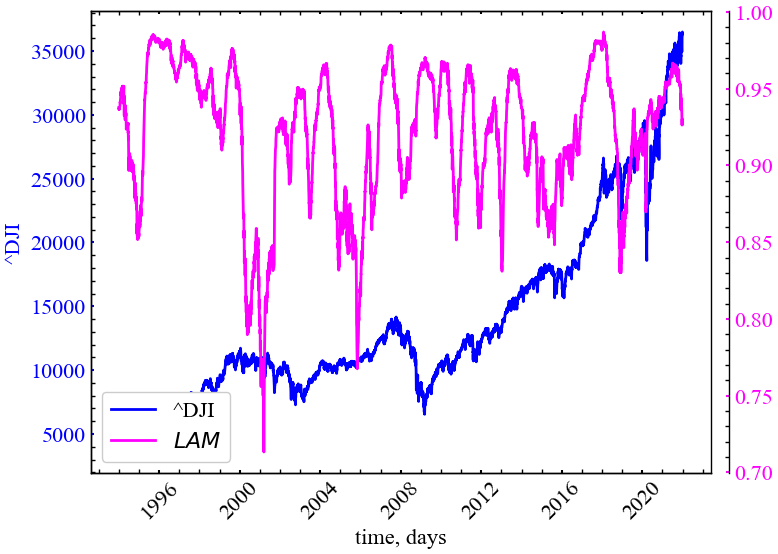

In [24]:
#| label: fig-dji-lam 
#| fig-cap: "Динаміка індексу Доу-Джонса та ламінарності"

plot_recurrence_measure(measure=LAM, label='LAM')

Можна бачити, що в умовах криз ступінь ламінарності зростає. Зростає і щільність діагональних точок, і загалом кількість рекурентних траєкторій у фазовому просторі. Кризи характеризуються трендостійкістю, персистентністю та детермінованістю своєї поведінки.

#### Середня довжина діагональних ліній 

Також можна виміряти **середню довжину діагональних ліній** (average diagonal lines length). Cередня довжина діагональних лінії визначається як

$$
L = \sum_{{\ell=\ell_{\min}}}^{N}\ell \cdot P(\ell) \Bigg/ \sum_{{\ell=\ell_{\min}}}^{N}P(\ell).
$$

Загалом цей показник характеризує середній період часу при якому дві траєкторії фазового простору знаходяться в достатній близькості один до одного. 

::: {.callout-tip}
## Додаткова інформація по середній довжині діагональних ліній

Середня довжина діагональних ліній визначає середній час при якому система залишається передбачуваною

:::

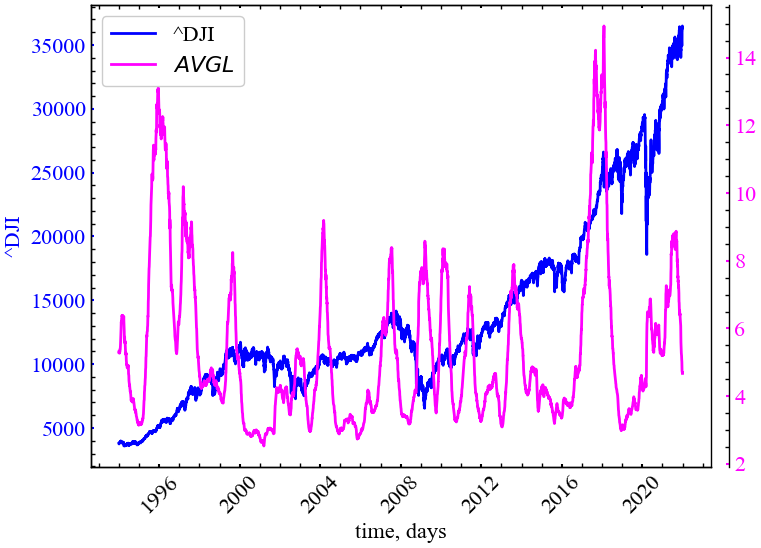

In [25]:
#| label: fig-dji-avgl 
#| fig-cap: "Динаміка індексу Доу-Джонса та середньої довжини діагональних ліній"

plot_recurrence_measure(measure=AVG_DIAG_LINE, label='AVG L')

Як і до цього, ми можемо бачити, що середній час перебування Доу-Джонса у детермінованому стані зростає під час кризових явищ, що свідчить про  зростання ступеня колективізації трейдерів на ринку.

#### Час захоплення/затримки 

Усереднена довжина діагональної лінії пов'язана з часом передбачуваності динамічної системи та **часом затримки** (trapping time):

$$
TT = \sum_{{v=v_{\min}}}^{{N}}v \cdot P(v) \Bigg/ \sum_{{v=v_{\min}}}^{{N}}P(v). 
$$

::: {.callout-tip}
## Додаткова інформація по середній довжині вертикальних ліній

Середня довжина вертикальних ліній визначає середній час перебування системи в ламінарному стані. Тобто, вона відповідає середньому періоду часу при якому система "завмирає" у певному стані.  Очевидно, що зростання цiєї величини характеризує дедалi бiльший час затримки дослiджуваної системи в
певному станi

:::

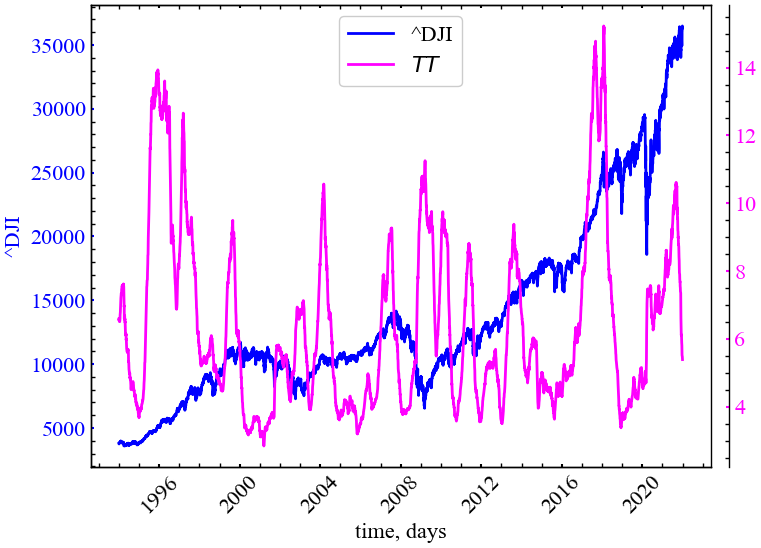

In [26]:
#| label: fig-dji-tt
#| fig-cap: "Динаміка індексу Доу-Джонса та час затримки"

plot_recurrence_measure(measure=TT, label='TT')

На представленому рисунку ([@fig-dji-tt]) видно, що $TT$ зростає в (перед-)кризові стани, що вказує на намагання системи перебувати ще деякий деякий час у стані кризи.

#### Середня довжина білих вертикальних лінії 

**Середня довжина білих вертикальних ліній** (average white vertical lines length) може бути визначена як 

$$
WVL_{mean} = \sum_{w=w_{min}}^{N} w \cdot P(w) \Bigg/ \sum_{w=w_{min}}^{N} P(w).
$$

$P(w)$ --- це частотний розподіл білих вертикальних ліній довжиною $w$, а $w_{min}$ відповідає найменшій довжині білих вертикальних ліній (найменшому періоду повернення до стану рекурентності).

::: {.callout-tip}
## Додаткова інформація по середній довжині білих вертикальних ліній

Представлену міру можна охарактеризувати як середній горизонт *непередбачуваності* системи

:::

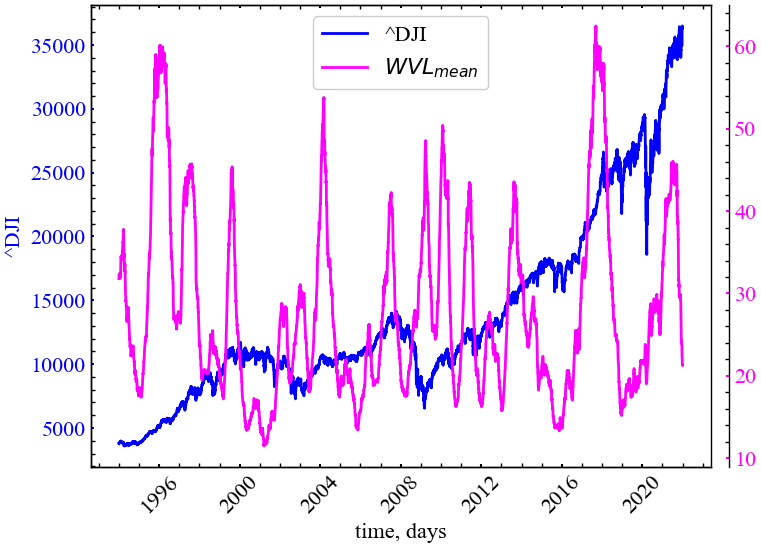

In [27]:
#| label: fig-dji-avgv
#| fig-cap: "Динаміка індексу Доу-Джонса та середньої довжини білих вертикальних ліній"

plot_recurrence_measure(measure=AVG_WVERT_LINE, label='WVL_{mean}')

Зростання середньої довжини бiлих вертикальних лiнiй на [@fig-dji-avgv] демонструє, що кризовi подiї характеризуються не лише детермiнiзмом динамiки фондового ринку, але й несхожiстю даних подiй у порiвняннi з попереднiми станами.

#### Ентропія діагональних ліній 

Для відповідних діагональних сегментів можна розрахувати необхідну кількість інформації для опису всього розподілу цього типу ліній. Імовірність $p(\ell )$ того, що діагональна лінія має довжину $\ell$, можна оцінити за частотним розподілом $P(\ell )$ із $p( \ell ) = P(\ell) \Big/ \sum_{{\ell=\ell_{\min}}}^{N}P(\ell)$. **Ентропію Шеннона** ймовірності появи таких діагональних ліній (diagonal lines entropy) можна визначити наступним чином:

$$
DLEn = -\sum_{{\ell =\ell _{\min }}}^{N}p(\ell )\ln p(\ell ). 
$$

Даний показник відображає складність досліджуваної структури.

::: {.callout-tip}
## Додаткова інформація по ентропії діагональних ліній

Для некорельованого шуму чи осциляцiй ми тримали б мале значення ентропiї, що вказувало б на асиметричний розподіл діагональних ліній: існувала б невеличка частка діагональних ліній конкретної довжини, що характеризувала б рекурентність досліджуваної системи. Зростання даної ентропії свідчило б про зростання симетричності розподілу довжин діагональних ліній

:::

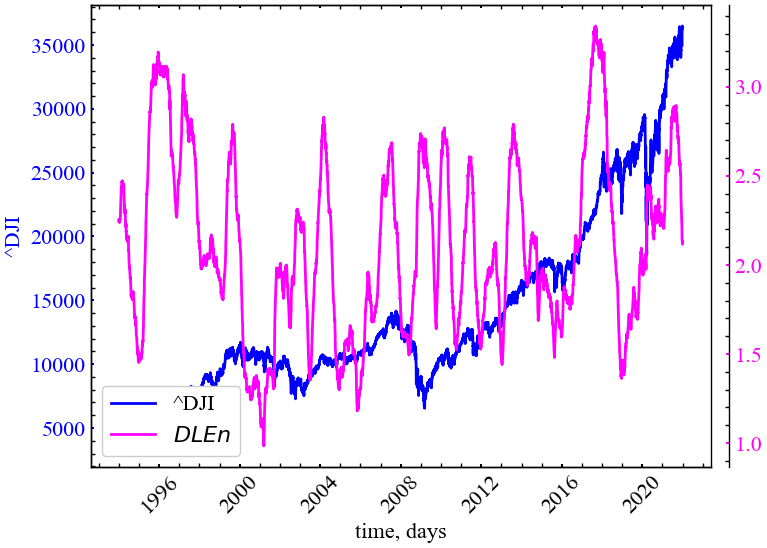

In [28]:
#| label: fig-dji-dlen
#| fig-cap: "Динаміка індексу Доу-Джонса та ентропії діагональних ліній"

plot_recurrence_measure(measure=ENT_DIAG, label='DLEn')

На [@fig-dji-dlen] видно, що ентропія діагональних ліній зростає під час кризових явищ, що вказує на зростання впливу детермінованих процесів із різним ступенем передбачуваності.

#### Ентропія вертикальних ліній 

Ми можемо визначити **Шеннонівську ентропію для розподілу вертикальних структур** (vertical lines entropy) рекурентної діаграми. Імовірність $p( v )$ того, що вертикальна лінія має довжину $v$, можна оцінити за частотним розподілом $P(v)$ із $p(v) = P(v) \Big/ \sum_{{v=v_{\min}}}^{N}P(v)$. Ентропія Шеннона цієї ймовірності визначається як

$$
 VLEn =-\sum_{{ v = v_{\min }}}^{N}p( v )\ln p( v ).
$$

Ця міра, по аналогії до попередньої ентропії, також є мірою складності системи. 

::: {.callout-tip}
## Додаткова інформація по ентропії вертикальних ліній

Для синусоїдального процесу ми би очікували мале значення даної ентропії, оскільки це простий періодичний процес. Для складного процесу з пам'ятю очiкуємо високе значення цього типу рекурентної ентропiї. Це означатиме, що ламiнарнiсть процесу характеризуються рiзноманiтними перiодами довгостроковості пам'яті системи

:::

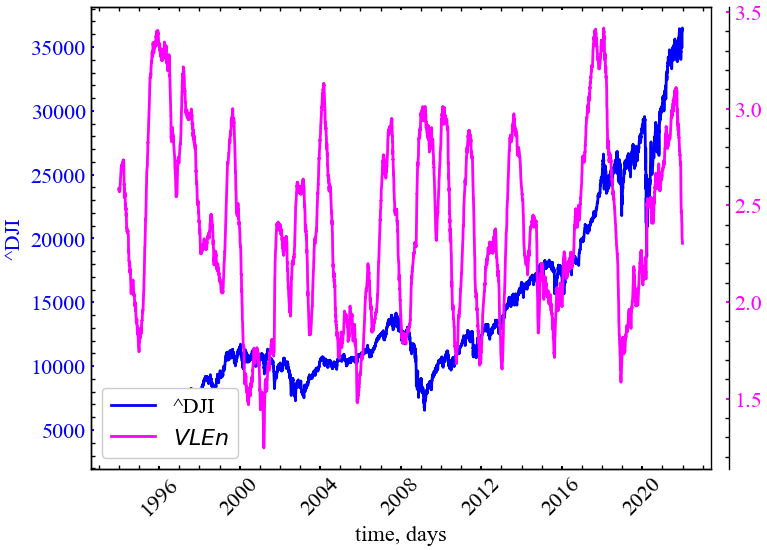

In [29]:
#| label: fig-dji-vlen
#| fig-cap: "Динаміка індексу Доу-Джонса та ентропії вертикальних ліній"

plot_recurrence_measure(measure=ENT_VERT, label='VLEn')

На [@fig-dji-vlen] видно, що ентропія вертикальних ліній починає зростати під час крахових явищ, що вказує на зростання ступеня ламінарності, тобто зростання рівномірності розподілу вертикальних ліній різних довжин. 

#### Дивергенція

Показник $L_{\max }$ може надати нам інформацію про максимальний ступінь передбачуваності досліджуваного періоду. Зворотнє значення **максимальної довжини діагональних ліній** $L_{\max }$ або **дивергенція (розбіжність, divergence)** може вказати нам на швидкість та тривалість розбіжності досліджуваних траєкторій. Даний показник можна визначити як

$$ 
DIV = 1 \big/ L_{\max}. 
$$

Дана міра схожа на старший показник Ляпунова [@Eckmann_1987]. Однак взаємозв'язок між цією мірою та позитивним максимальним показником Ляпунова набагато складніший (щоб обчислити показник Ляпунова з RP, необхідно враховувати весь розподіл частот діагональних ліній).

::: {.callout-tip}
## Додаткова інформація по дивергенції

Чим вище значення дивергенції, тим швидше розбігаються траєкторії фазового простору. І навпаки, чим нижче значення дивергенції, тим ближче досліджувані траєкторії прилягають одна до одної

:::

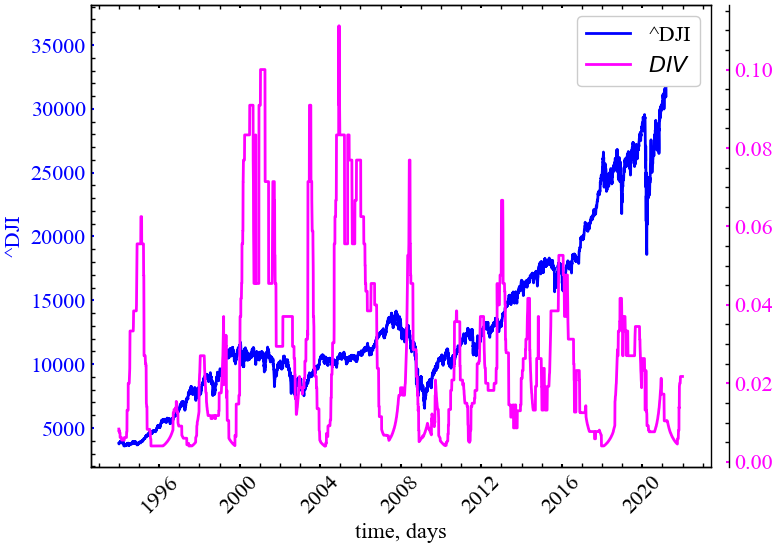

In [30]:
#| label: fig-dji-div
#| fig-cap: "Динаміка індексу Доу-Джонса та дивергенції"

plot_recurrence_measure(measure=DIV, label='DIV')

[@fig-dji-div] показує, що дивергенція діагональних ліній починає спадати в кризові та передкризові періоди, що також вказує на зростання ступеня впорядкованості динаміки системи в дані періоди часу.

#### Дивергенція вертикальних ліній

Зворотнє значення **максимальної довжини вертикальних ліній** $V_{max}$ або **розбіжність вертикальних ліній** (vertical line divergence) можна визначити як

$$ 
VDIV = 1 \big/ V_{\max}. 
$$

::: {.callout-tip}
## Додаткова інформація по дивергенції вертикальних ліній

Максимальна довижна вертикальних ліній надавала нам інформацію про максимальний ступінь незмінюваності системи. Вертикальна дивергенція дозволяє нам охарактеризувати швидкість настання або спаду ламінарності у системі. Чим вище значення $VDIV$, тим швидше система виходить із ламінарного стану і навпаки

:::

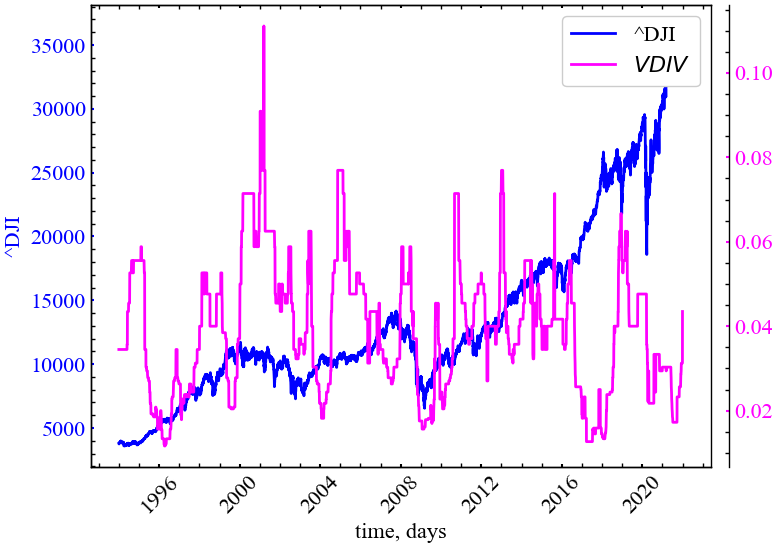

In [31]:
#| label: fig-dji-vdiv
#| fig-cap: "Динаміка індексу Доу-Джонса та дивергенції вертикальних ліній"

plot_recurrence_measure(measure=VERT_DIV, label='VDIV')

На даному рисунку ([@fig-dji-vdiv]) видно, що періоди криз характеризуються спадом вертикальної дивергенції, тобто зростанням кількості вертикальних структур, що характеризують ще більший ступінь ламінарності станів. 

#### Дивергенція білих вертикальних ліній

Зворотнє значення **максимальної довжини білих вертикальних ліній** ($WVL_{max}$) можна охарактеризувати як **дивергенцію білих вертикальних ліній** (white vertical lines divergence). Її можна визначити наступним чином:

$$
WVDIV = 1 \big/ WVL_{max}. 
$$

Зростання даного показника має вказувати на зростання ступеня рекурентності системи, а його спад має демонструвати зростання непередбачуваності. 

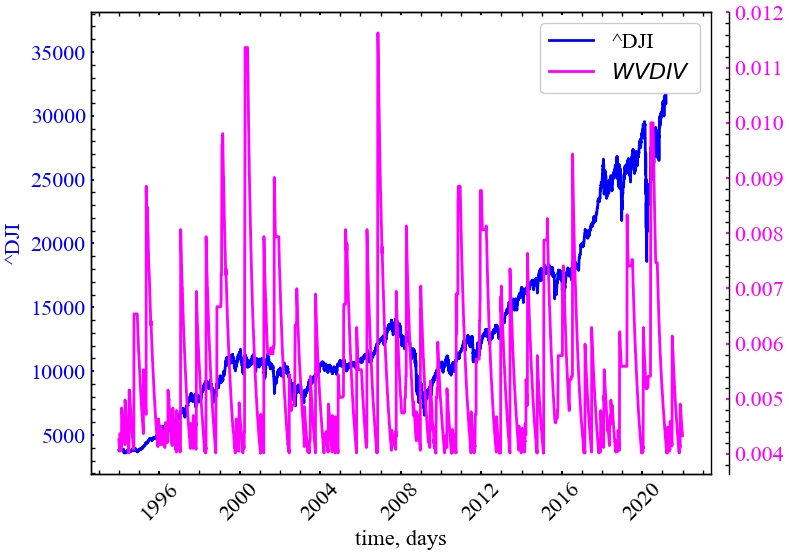

In [32]:
#| label: fig-dji-wvdiv
#| fig-cap: "Динаміка індексу Доу-Джонса та дивергенції білих вертикальних ліній"

plot_recurrence_measure(measure=WHITE_VERT_DIV, label='WVDIV')

На [@fig-dji-wvdiv] видно, що дивергенція білих вертикальних ліній представляє доволі зашумлену динаміку, а тому не може бути використана в якості ефективного індикатора кризових явищ. 

#### Ентропія білих вертикальних ліній 

Імовірність $p( \omega )$ того, що біла вертикальна лінія має довжину $\omega$, можна оцінити за частотним розподілом $P(\omega)$ із $p(\omega) = P(\omega) \Big/ \sum_{{\omega=\omega_{\min}}}^{N} P(\omega)$. **Ентропія Шеннона ймовірності появи білих вертикальних ліній** (white vertical lines entropy) визначається як

$$
WVertEn=-\sum_{{\omega =\omega _{\min }}}^{N}p(\omega )\ln p(\omega ),
$$

де $\omega_{min}$ --- мінімальна довжина білої вертикальної лінії. 

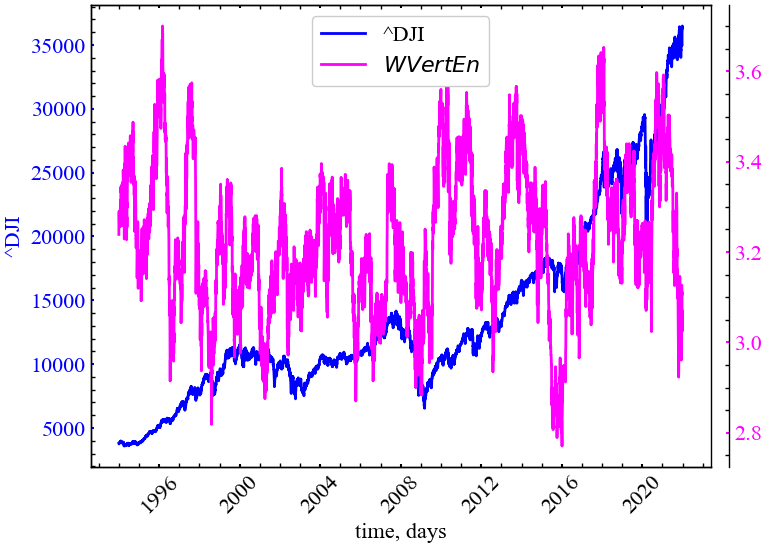

In [33]:
#| label: fig-dji-wvlen
#| fig-cap: "Динаміка індексу Доу-Джонса та ентропії білих вертикальних ліній"

plot_recurrence_measure(measure=ENT_WHITE_VERT, label='WVertEn')

Видно, що ентропія білих вертикальних ліній спадає у кризові та передкризові періоди фондового ринку і вказує на зростання загальної передбачуваності системи та зміщення розподілу білих вертикальних ліній до конкретних довжин. Тобто, їх розподіл у періоди криз стає менш симетричним і сигналізує про поступове заміщення білих вертикальних ліній чорними. 

#### Співвідношення частоти рекурентності до детермінізму $\left( DET/RR \right)$

**Співвідношення між $DET$ і $RR$ $\left( RATIO \right)$** можна використовувати для виявлення прихованих фазових переходів у системи:

$$
RATIO_1 = DET \Big/ RR = N^2 \cdot \left( \sum_{l=l_{min}}^{N}l \cdot P(l) \right) \Bigg/ \left(\sum_{l=1}^{N}lP(l)\right)^2.
$$

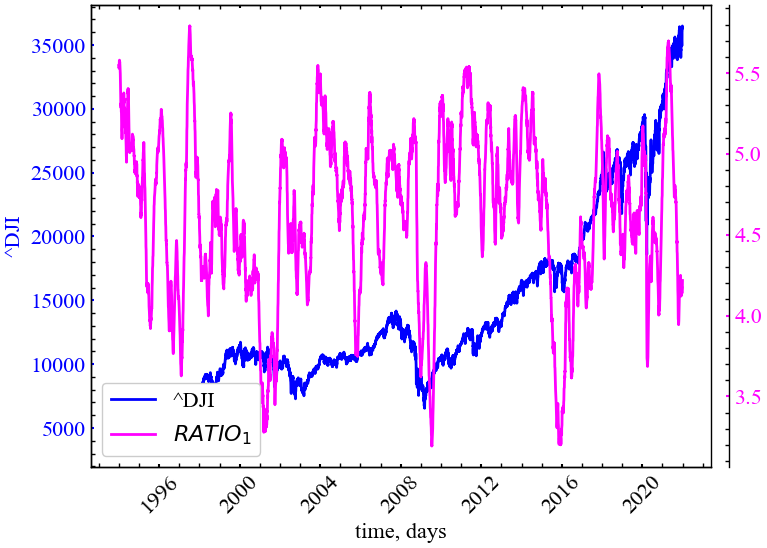

In [34]:
#| label: fig-dji-det_rr
#| fig-cap: "Динаміка індексу Доу-Джонса та співвідношення 
#| між мірою передбачуваності та рекурентності"

plot_recurrence_measure(measure=RATIO_DET_REC, label='RATIO_1')

Даний показник спадає під час кризових явищ фондового ринку. Це говорить про те, що має зростати загальна щільність рекурентних точок, як ізольованих, так і всього розподілу вертикальних структур. У кризові періоди $RR$ є вищою за $DET$. 

#### Співвідношення ламінарності до детермінізму $\left( LAM/DET \right)$

Так само як і попередня міра, **відношення ламінарності до детермінізму** може дозволити нам виокремити приховані переходи в досліджуваному сигналі:

$$
RATIO_2 = LAM \big/ DET.
$$

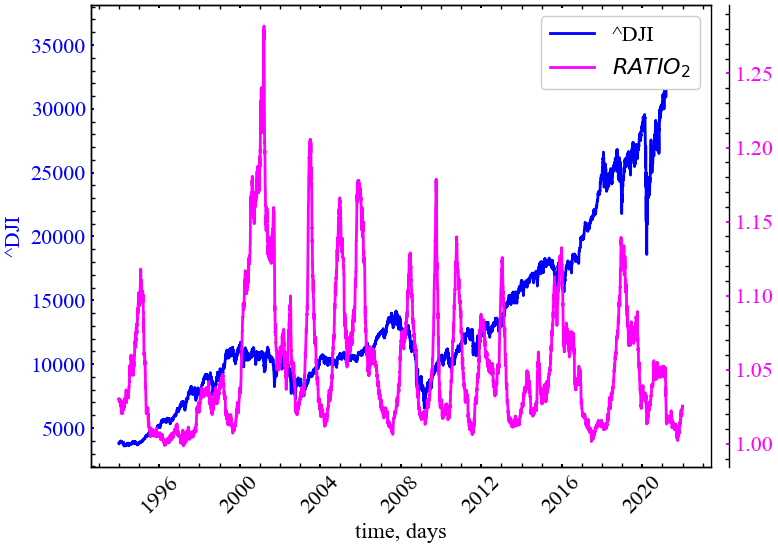

In [35]:
#| label: fig-dji-lam_det
#| fig-cap: "Динаміка індексу Доу-Джонса та співвідношення 
#| між мірою ламінарності та детермінізмом"

plot_recurrence_measure(measure=RATIO_LAM_DET, label='RATIO_2')

Якщо виходити з динаміки показника $RATIO_2$, можна сказати, що загальний ступінь детермінізму починає переважати над ламінарністю під час кризових явищ. 

## Висновок 

У даній лабораторній роботі було представлено кількісні рекурентні показники для дослідження еволюції системи. Дані міри було застосовано до часового ряду, що представляє ціни закриття фондового індексу Доу Джонса. Було продемонстровано, що кількісні показники здатні виявляти переходи між хаотичними та періодичними станами (і навпаки), дозволяють ідентифікувати ламінарні стани (хаос-хаос переходи), стани детермінованості й час до настання стану передбачуваності. За результатами представлених показників ми можемо сказати, що досліджувані крахові та передкрахові події характеризуються зростанням рекурентності, і подібного роду поведінка може бути використана в якості передвісника можливих кризових явищ.

## Завдання для самостійної роботи

1. Виберіть за рекомендацією викладача свій варіант часового ряду
2. Проведіть дослідження динаміки кількісних мір рекурентності згідно інструкції
3. Зробити висновки